In [449]:
import pandas as pd
import numpy as np
import seaborn as sns

In [450]:
    external_purchase =pd.read_csv('data/external_purchase.csv')
    material=pd.read_csv('data/material.csv')
    plant=pd.read_csv('data/plant.csv')
    supplier=pd.read_csv('data/supplier.csv')

In [451]:
#1 understanding the data and cleaning the data

In [452]:
external_purchase.head()

,materialId,plantId,supplierId,unitOfMeasure,quantityInUnitOfMeasure
0,10001,ABC,40001.0,KG,11125
1,10001,ABC,40001.0,KG,18808
2,10002,ABC,40002.0,KG,16758
3,10003,DEF,40003.0,KG,7407
4,10004,DEF,40003.0,KG,13061


In [453]:
external_purchase.shape

(3717, 5)

In [454]:
external_purchase.describe()

,materialId,supplierId
count,3717.000000,3713.000000
mean,10014.883508,40008.941826
std,22.902168,12.787169
min,10001.000000,40001.000000
25%,10001.000000,40001.000000
50%,10004.000000,40003.000000
75%,10013.000000,40014.000000
max,10084.000000,40069.000000


In [455]:
external_purchase.nunique()

materialId                   84
plantId                       3
supplierId                   69
unitOfMeasure                 1
quantityInUnitOfMeasure    3456
dtype: int64

In [456]:
external_purchase.dtypes

materialId                   int64
plantId                     object
supplierId                 float64
unitOfMeasure               object
quantityInUnitOfMeasure     object
dtype: object

In [457]:
external_purchase.isnull().sum()

materialId                 0
plantId                    0
supplierId                 4
unitOfMeasure              0
quantityInUnitOfMeasure    0
dtype: int64

In [458]:
external_purchase[external_purchase.supplierId.isnull()]

,materialId,plantId,supplierId,unitOfMeasure,quantityInUnitOfMeasure
14,10001,ABC,NaN,KG,20014
152,10001,ABC,NaN,KG,25798
308,10001,ABC,NaN,KG,29823
575,10001,ABC,NaN,KG,25041


In [459]:
external_purchase[external_purchase.materialId==10001]

,materialId,plantId,supplierId,unitOfMeasure,quantityInUnitOfMeasure
0,10001,ABC,40001.0,KG,11125
1,10001,ABC,40001.0,KG,18808
12,10001,ABC,40001.0,KG,11834
13,10001,ABC,40001.0,KG,16129
14,10001,ABC,NaN,KG,20014
...,...,...,...,...,...
3711,10001,ABC,40001.0,KG,646
3712,10001,ABC,40001.0,KG,19871
3713,10001,ABC,40001.0,KG,19422
3714,10001,ABC,40001.0,KG,17454


In [460]:
replace_dict=dict(zip(external_purchase.materialId, external_purchase.supplierId))

In [461]:
external_purchase.supplierId=external_purchase.materialId.apply(lambda x: str(int(replace_dict[x])))

In [462]:
external_purchase.quantityInUnitOfMeasure.unique()

array(['11125', '18808', '16758', ..., '17454', '31442', '24100'],
      dtype=object)

In [442]:
external_purchase.materialId=external_purchase.materialId.astype(object)
external_purchase.plantId=external_purchase.plantId.astype(object)
external_purchase.supplierId=external_purchase.supplierId.astype(object)
external_purchase.unitOfMeasure=external_purchase.unitOfMeasure.astype(object)
external_purchase.quantityInUnitOfMeasure=external_purchase.quantityInUnitOfMeasure.apply(lambda x:abs(float(x.replace('KG',''))) if not isinstance(x, float) else float(x))

In [443]:
external_purchase.dtypes

materialId                  object
plantId                     object
supplierId                  object
unitOfMeasure               object
quantityInUnitOfMeasure    float64
dtype: object

In [444]:
external_purchase[external_purchase.quantityInUnitOfMeasure<0]

,materialId,plantId,supplierId,unitOfMeasure,quantityInUnitOfMeasure


In [439]:
material.head()

,uid,text
0,10001,Material 1
1,10002,Material 2
2,10003,Material 3
3,10004,Material 4
4,10005,Material 5


In [440]:
material.nunique()

uid     84
text    84
dtype: int64

In [441]:
material.shape


(84, 2)

In [223]:
material.describe()

,uid
count,84.000000
mean,10042.500000
std,24.392622
min,10001.000000
25%,10021.750000
50%,10042.500000
75%,10063.250000
max,10084.000000


In [237]:
material.dtypes

uid      int64
text    object
dtype: object

In [241]:
material.isnull().sum()

uid     0
text    0
dtype: int64

In [261]:
material.uid=material.uid.astype(object)

In [263]:
material.dtypes

uid     object
text    object
dtype: object

In [227]:
plant.head()

,uid,text,region
0,ABC,Plant A,EU
1,DEF,Plant B,EU
2,GHI,Plant C,USA


In [228]:
plant.nunique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [229]:
plant.shape

(3, 3)

In [230]:
plant.describe()

,uid,text,region
count,3,3,3
unique,3,3,2
top,ABC,Plant A,EU
freq,1,1,2


In [238]:
plant.dtypes

uid       object
text      object
region    object
dtype: object

In [242]:
plant.isnull().sum()

uid       0
text      0
region    0
dtype: int64

In [231]:
supplier.head()

,uid,text
0,40001,Supplier 1
1,40002,Supplier 2
2,40003,Supplier 3
3,40004,Supplier 4
4,40005,Supplier 5


In [447]:
supplier.uid.unique()

array([40001, 40002, 40003, 40004, 40005, 40006, 40007, 40008, 40009,
       40010, 40011, 40012, 40013, 40014, 40015, 40016, 40017, 40018,
       40019, 40020, 40021, 40022, 40023, 40024, 40025, 40026, 40027,
       40028, 40029, 40030, 40031, 40032, 40033, 40034, 40035, 40036,
       40037, 40038, 40039, 40040, 40041, 40042, 40043, 40044, 40045,
       40046, 40047, 40048, 40049, 40050, 40051, 40052, 40053, 40054,
       40055, 40056, 40057, 40058, 40059, 40060, 40061, 40062, 40063,
       40064, 40065, 40066, 40067, 40068, 40069])

In [232]:
supplier.nunique()

uid     69
text    69
dtype: int64

In [233]:
supplier.shape

(69, 2)

In [234]:
supplier.describe()

,uid
count,69.000000
mean,40035.000000
std,20.062403
min,40001.000000
25%,40018.000000
50%,40035.000000
75%,40052.000000
max,40069.000000


In [239]:
supplier.dtypes

uid      int64
text    object
dtype: object

In [243]:
supplier.isnull().sum()

uid     0
text    0
dtype: int64

In [264]:
supplier.uid=supplier.uid.astype(object)

In [265]:
supplier.dtypes

uid     object
text    object
dtype: object

In [36]:
# relationship analysis

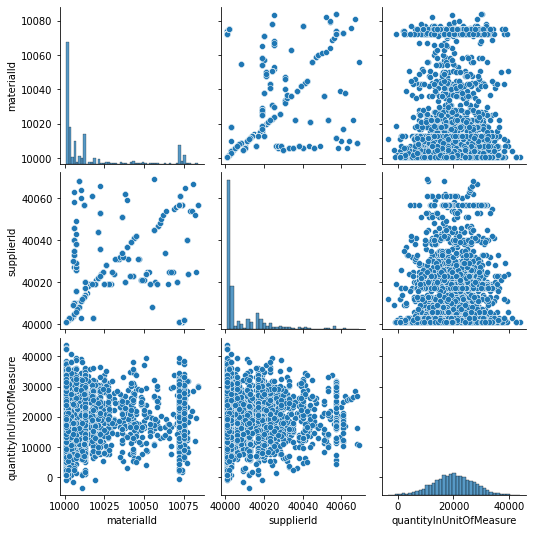

In [270]:
sns.pairplot(external_purchase)

In [267]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

ValueError: zero-size array to reduction operation fmin which has no identity

,materialId,plantId,supplierId,unitOfMeasure,quantityInUnitOfMeasure
0,10001,ABC,40001.0,KG,11125
1,10001,ABC,40001.0,KG,18808
12,10001,ABC,40001.0,KG,11834
13,10001,ABC,40001.0,KG,16129
14,10001,ABC,NaN,KG,20014
...,...,...,...,...,...
3711,10001,ABC,40001.0,KG,646
3712,10001,ABC,40001.0,KG,19871
3713,10001,ABC,40001.0,KG,19422
3714,10001,ABC,40001.0,KG,17454
